In [1]:
#importing all the necessary libraries
import tensorflow as tf
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

c:\users\hp\anaconda3\envs\testenv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#one hot encoded function for the labels
def one_hot_encode(x):
    from sklearn.preprocessing import OneHotEncoder
    enc=OneHotEncoder(n_values=5)
    ohc_labels=enc.fit_transform(np.array(x).reshape(-1,1)).toarray()
    return ohc_labels

In [16]:
n_samples = 4
top_n_predictions = 3
save_model_path='F:/Work/capstone'

In [17]:
#helper function for displaying the predictions of the model
def display_image_predictions(features, labels, predictions):
    n_classes = 5
    label_names = [0,1,2,3,4]
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(nrows=4, ncols=2)
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 3
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = label_names[label_id]

        axies[image_i][0].imshow(feature)
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])

        

#This function will load the model and do predictions on the testing dataset
def test_model():
    
    loaded_graph = tf.Graph()
    
    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_probs:0')
        loaded_acc = loaded_graph.get_tensor_by_name('acc:0')
        loaded_model = loaded_graph.get_tensor_by_name('model:0')
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for i in range(0,4):
            x_test_img=x_test[i]
            y_test_img=one_hot_encode(y_test[i])
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: x_test_img, loaded_y: y_test_img, loaded_keep_prob: 1.0})
            test_batch_count += 1
        
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(x_test_img, y_test_img)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(loaded_model, top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions)

In [8]:
#creating the test dataset
import pandas as pd
import os
DATA_DIR = "E:\\train"
names=[]
i=0
for root, dirs, files in os.walk(DATA_DIR,topdown=False):
    for name in files:
        names.append(name.replace('.jpeg',''))
df_Org=pd.read_csv("E:\\trainLabels.csv\\trainLabels.csv")
sf=df_Org.values.tolist()


df=[]
for name in names:
    for i in range (0,len(sf)):
        if(sf[i][0]==name):
            df.append(sf[i])


x=[]
y=[]
for i in range (0,len(df)-1):
    img = cv2.imread("E://train//"+df[i][0]+".jpeg")
    img = cv2.resize(img,(512,340))
    img = np.array(img).reshape((340,512,3))
    x.append(img)
    y.append(df[i][1])
    i+=1
x=np.array(x)
y=np.array(y)
y=np.array(y).reshape(len(y),1)

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2987, random_state=42)

X_test=x_test[:400]
Y_test=y_test[:400]
x_test=np.split(X_test,4)
y_test=np.split(Y_test,4)

INFO:tensorflow:Restoring parameters from F:/Work/capstone


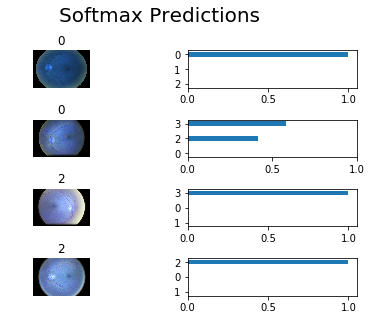

In [18]:
#getting the predictions for some random images
import random
test_model()